# Assignment 2 (90 marks)

## *The adverse health effects of air pollution - are we making any progress?*

<p><img src=files/air.jpg width="900"></p>
<p><strong>Credit:</strong>  <a href="https://www.flickr.com/people/44221799@N08/">Flickr/E4C</a> </p>

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

warnings.filterwarnings("ignore")  # Suppress all warnings

<h2>Introduction</h2>
<p><strong>Business Context.</strong> Air pollution is a very serious issue that the global population is currently dealing with. The abundance of air pollutants is not only contributing to global warming, but it is also causing problematic health issues to the population. There have been numerous efforts to protect and improve air quality across most nations. However, it seems that we are making very little progress. One of the main causes of this is the fact that the majority of air pollutants are derived from the burning of fossil fuels such as <em>coal</em>. Big industries and several other economical and political factors have slowed the progress towards the use of renewable energy by promoting the use of fossil fuels. Nevertheless, if we educate the general population and create awareness of this issue, we will be able to overcome this problem in the future.      </p>
<p>For this case, you have been hired as a data science consultant for an important environmental organization. In order to promote awareness of environmental and greenhouse gas issues, your client is interested in a study of <strong>plausible impacts of air contamination on the health of the global population</strong>. They have gathered some <em>raw</em> data provided by the <a href="https://www.who.int/">World Health Organization</a>, <a href="http://www.healthdata.org/">The Institute for Health Metrics and Evaluation</a> and the <a href="https://www.worldbank.org/">World Bank Group</a>. Your task is to conduct data analysis, search for potential information, and create visualizations that the client can use for their campaigns and grant applications. </p>
<p><strong>Analytical Context.</strong> You are given a folder, named <code>files</code> with <em>raw</em> data. This data contains quite a large number of variables and it is in a fairly disorganized state. In addition, one of the datasets contains very poor documentation, segmented into several datasets. Your objective will be to:</p>
<ol>
<li>Extract and clean the relevant data. You will have to manipulate several datasets to obtain useful information for the case. </li>
<li>Conduct Exploratory Data Analysis. You will have to create meaningful plots, formulate meaningful hypotheses and study the relationship between various indicators related to air pollution.</li>
</ol>
<p>Additionally, the client has some broad questions they would like to answer:<br />
1. Are we making any progress in reducing the amount of emitted pollutants across the globe?<br />
2. Which are the critical regions where we should start environmental campaigns?<br />
3. Are we making any progress in the prevention of deaths related to air pollution?<br />
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </p>

<h2>Extracting and cleaning relevant data</h2>
<p>Let's take a look at the data provided by the client in the <code>files</code> folder. There, we see another folder  named <code>WDI_csv</code> with several CSV files corresponding to the World Bank's primary <a href="https://datacatalog.worldbank.org/dataset/world-development-indicators">World Development Indicators</a>. The client stated that this data may contain some useful information relevant to our study, but they have not told us anything aside from that. Thus, we are on our own in finding and extracting the relevant data for our study. This we will do next. </p>
<p>Let's take a peek at the file <code>WDIData.csv</code>:</p>

In [2]:
WDI_data = pd.read_csv("WDIData.csv")
print(WDI_data.columns)
print(WDI_data.info())
WDI_data.head()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377256 entries, 0 to 377255
Data columns (total 65 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    377256 non-null  object 
 1   Country Code    377256 non-null  object 
 2   Indicator Name  377256 non-null  object 
 3   Indicator Co

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN


<p>The data seems to have a large number of indicators dating from 1960. There are also columns containing country names and codes. Notice that the first couple of rows say <code>Arab World</code>, which may indicate that the data contains broad regional data as well. We notice also that there are at least 100,000 entries with <code>NaN</code> values for each year column.</p>
<p>Since we are interested in environmental indicators, we must get rid of any rows not relevant to our study. However, the number of indicators seems to be quite large and a manual inspection seems impossible. Let's load the file <code>WDISeries.csv</code> which seems to contain more information about the indicators:</p>

In [3]:
WDI_ids = pd.read_csv("WDISeries.csv")
print(WDI_ids.columns)
WDI_ids.head()

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


<p>Bingo! The <code>WDI_ids</code> DataFrame contains a column named <code>Topic</code>. Moreover, it seems that <em>Environment</em> is listed as a key topic in the column.</p>

<h3>Exercise 1 (4 marks):</h3>
<p>Extract all the rows that have the topic key <em>Environment</em> in <code>WDI_ids</code>. Add to the resulting DataFrame a new column named <code>Subtopic</code> which contains the corresponding subtopic of the indicator. For example, the subtopic of <code>Environment: Agricultural production</code> is <code>Agricultural production</code>. Which subtopics do you think are of interest to us?</p>
<p><strong>Hint:</strong> Remember that you can apply string methods to Series using the <code>str()</code> method of <code>pandas</code>. </p>

**Answer.**

In [4]:
# Extract subtopics from the 'Topic' column
subtopics = WDI_ids['Topic'].str.split(':').str[-1].str.strip()

# Add the 'Subtopic' column to the DataFrame
WDI_ids['Subtopic'] = subtopics
#printing count of indicators

print(WDI_ids['Subtopic'].value_counts())
print("-------------------------------------------------------------------")
print("Top 5 indiactors are of interest to us" )
print("Economic activity                      77")
print("Official development assistance        62")
print("Structure                              58")
print("Business environment                   54")
print("Participation                          44")
print("-------------------------------------------------------------------")
# Display the resulting DataFrame
#print(environment_rows)
#WDI_ids.head()
WDI_ids.head(100)

 


Economic activity                             77
Official development assistance               62
Structure                                     58
Business environment                          54
Participation                                 44
                                              ..
Trade price indices                            2
Government finance                             1
Total merchandise trade                        1
Agency                                         1
World Bank, International Debt Statistics.     1
Name: Subtopic, Length: 79, dtype: int64
-------------------------------------------------------------------
Top 5 indiactors are of interest to us
Economic activity                      77
Official development assistance        62
Structure                              58
Business environment                   54
Participation                          44
-------------------------------------------------------------------


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,Subtopic
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,Agricultural production
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN,Agricultural production
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN,Agricultural production
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,Land use
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,Land use
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,DC.DAC.FRAL.CD,Economic Policy & Debt: Official development a...,"Net bilateral aid flows from DAC donors, Franc...",NaN,Net bilateral aid flows from DAC donors are th...,NaN,Annual,NaN,NaN,Sum,...,NaN,Development Assistance Committee of the Organi...,The Development Assistance Committee (DAC) of ...,NaN,NaN,NaN,NaN,CC BY-4.0,NaN,Official development assistance
96,DC.DAC.GBRL.CD,Economic Policy & Debt: Official development a...,"Net bilateral aid flows from DAC donors, Unite...",NaN,Net bilateral aid flows from DAC donors are th...,NaN,Annual,NaN,NaN,Sum,...,NaN,Development Assistance Committee of the Organi...,The Development Assistance Committee (DAC) of ...,NaN,NaN,NaN,NaN,CC BY-4.0,NaN,Official development assistance
97,DC.DAC.GRCL.CD,Economic Policy & Debt: Official development a...,"Net bilateral aid flows from DAC donors, Greec...",NaN,Net bilateral aid flows from DAC donors are th...,NaN,Annual,NaN,NaN,Sum,...,NaN,Development Assistance Committee of the Organi...,The Development Assistance Committee (DAC) of ...,NaN,NaN,NaN,NaN,CC BY-4.0,NaN,Official development assistance
98,DC.DAC.IRLL.CD,Economic Policy & Debt: Official development a...,"Net bilateral aid flows from DAC donors, Irela...",NaN,Net bilateral aid flows from DAC donors are th...,NaN,Annual,NaN,NaN,Sum,...,NaN,Development Assistance Committee of the Organi...,The Development Assistance Committee (DAC) of ...,NaN,NaN,NaN,NaN,CC BY-4.0,NaN,Official development assistance


<h3>Exercise 2 (4 marks):</h3>
<p>Use the results of Exercise 1 to create a new DataFrame with the history of all emissions indicators for countries and major regions. Call this new DataFrame <code>Emissions_df</code>. How many emissions indicators are in the study?</p>

**Answer.**

In [26]:
# Create a new DataFrame containing only the desired columns
#temp_1_df = WDI_ids[[# Create a new DataFrame containing only the desired columns
temp_1_df = WDI_ids[['Series Code', 'Indicator Name', 'Subtopic']]
temp_2_df = WDI_data.copy()
Emissions_df = temp_1_df.merge(temp_2_df, left_on='Series Code', right_on='Indicator Code')
Emissions_df = Emissions_df.drop('Indicator Name_y', axis=1)
Emissions_df = Emissions_df.drop('Series Code', axis=1)
Emissions_df = Emissions_df.drop('Unnamed: 64', axis=1)

#rename(columns={'oldName1': 'newName1
Emissions_df = Emissions_df.rename(columns={'Indicator Name_x': 'Indicator Name'})
# Display the resulting data frame
print(Emissions_df)
Emissions_df = Emissions_df.drop('Subtopic', axis=1)
Emissions_df.head(100)




                                           Indicator Name  \
0                        Agricultural machinery, tractors   
1                        Agricultural machinery, tractors   
2                        Agricultural machinery, tractors   
3                        Agricultural machinery, tractors   
4                        Agricultural machinery, tractors   
...                                                   ...   
377251  Presence of peace keepers (number of troops, p...   
377252  Presence of peace keepers (number of troops, p...   
377253  Presence of peace keepers (number of troops, p...   
377254  Presence of peace keepers (number of troops, p...   
377255  Presence of peace keepers (number of troops, p...   

                       Subtopic                    Country Name Country Code  \
0       Agricultural production                      Arab World          ARB   
1       Agricultural production          Caribbean small states          CSS   
2       Agricultural produc

,Indicator Name,Country Name,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"Agricultural machinery, tractors",Arab World,ARB,AG.AGR.TRAC.NO,NaN,73480.0,76900.0,81263.0,86067.0,91117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Agricultural machinery, tractors",Caribbean small states,CSS,AG.AGR.TRAC.NO,NaN,8129.0,8348.0,8728.0,10061.0,11081.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Agricultural machinery, tractors",Central Europe and the Baltics,CEB,AG.AGR.TRAC.NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Agricultural machinery, tractors",Early-demographic dividend,EAR,AG.AGR.TRAC.NO,NaN,495487.0,528323.0,565048.0,598884.0,626817.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Agricultural machinery, tractors",East Asia & Pacific,EAS,AG.AGR.TRAC.NO,NaN,445478.0,463130.0,493185.0,524332.0,575313.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Agricultural machinery, tractors",Croatia,HRV,AG.AGR.TRAC.NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,"Agricultural machinery, tractors",Cuba,CUB,AG.AGR.TRAC.NO,NaN,11000.0,15000.0,18000.0,20000.0,22000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,"Agricultural machinery, tractors",Curacao,CUW,AG.AGR.TRAC.NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,"Agricultural machinery, tractors",Cyprus,CYP,AG.AGR.TRAC.NO,NaN,2880.0,3600.0,3990.0,4574.0,4718.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Exercise 3 (4 marks):</h3>
<p>The DataFrame <code>Emissions_df</code> has one column per year of observation. Data in this form is usually referred to as data in <em>wide format</em>, as the number of columns is high. However, it might be easier to query and filter the data if we had a single column containing the year in which each indicator was calculated. This way, <em>each observation will be represented by a single row</em>. Use the <code>pandas</code> function <a href="https://pandas.pydata.org/docs/reference/api/pandas.melt.html"><code>melt()</code></a> to reshape the <code>Emissions_df</code> data into <em>long format</em>. The resulting DataFrame should contain a pair of new columns named <code>Year</code> and <code>Indicator Value</code>:</p>

**Answer.**

In [27]:
Emissions_df = pd.melt(Emissions_df, id_vars=['Indicator Name', 'Country Name', 'Country Code', 'Indicator Code'], var_name='Year', value_name='Indicator Value')


print(Emissions_df.head())


                     Indicator Name                    Country Name  \
0  Agricultural machinery, tractors                      Arab World   
1  Agricultural machinery, tractors          Caribbean small states   
2  Agricultural machinery, tractors  Central Europe and the Baltics   
3  Agricultural machinery, tractors      Early-demographic dividend   
4  Agricultural machinery, tractors             East Asia & Pacific   

  Country Code  Indicator Code  Year  Indicator Value  
0          ARB  AG.AGR.TRAC.NO  1960              NaN  
1          CSS  AG.AGR.TRAC.NO  1960              NaN  
2          CEB  AG.AGR.TRAC.NO  1960              NaN  
3          EAR  AG.AGR.TRAC.NO  1960              NaN  
4          EAS  AG.AGR.TRAC.NO  1960              NaN  


<h3>Exercise 4 (4 marks):</h3>
<p>The column <code>Indicator Value</code> of the new <code>Emissions_df</code> contains a bunch of <code>NaN</code> values. Additionally, the <code>Year</code> column contains an <code>Unnamed: 64</code> value. What procedure should we follow to clean these missing values in our DataFrame? Proceed with your suggested cleaning process.</p>

In [32]:
#we will drop Unnamed: 64 as all the values in it are nan
#we fill some value using interpolitation but some has to be set to 0
Emissions_df['Indicator Value'] = Emissions_df['Indicator Value'].interpolate()
Emissions_df['Indicator Value'] = Emissions_df['Indicator Value'].fillna(0)

Emissions_df

,Indicator Name,Country Name,Country Code,Indicator Code,Year,Indicator Value
0,"Agricultural machinery, tractors",Arab World,ARB,AG.AGR.TRAC.NO,1960,0.000
1,"Agricultural machinery, tractors",Caribbean small states,CSS,AG.AGR.TRAC.NO,1960,0.000
2,"Agricultural machinery, tractors",Central Europe and the Baltics,CEB,AG.AGR.TRAC.NO,1960,0.000
3,"Agricultural machinery, tractors",Early-demographic dividend,EAR,AG.AGR.TRAC.NO,1960,0.000
4,"Agricultural machinery, tractors",East Asia & Pacific,EAS,AG.AGR.TRAC.NO,1960,0.000
...,...,...,...,...,...,...
22635355,"Presence of peace keepers (number of troops, p...",Virgin Islands (U.S.),VIR,VC.PKP.TOTL.UN,2019,4.898
22635356,"Presence of peace keepers (number of troops, p...",West Bank and Gaza,PSE,VC.PKP.TOTL.UN,2019,4.898
22635357,"Presence of peace keepers (number of troops, p...","Yemen, Rep.",YEM,VC.PKP.TOTL.UN,2019,4.898
22635358,"Presence of peace keepers (number of troops, p...",Zambia,ZMB,VC.PKP.TOTL.UN,2019,4.898


<h3>Exercise 5 (4 marks):</h3>
<p>Split the <code>Emissions_df</code> into two DataFrames, one containing only countries and the other containing only regions. Name these <code>Emissions_C_df</code> and <code>Emissions_R_df</code> respectively.</p>
<p><strong>Hint:</strong> You may want to inspect the file <code>WDICountry.csv</code> for this task. Region country codes may be found by looking at <code>null</code> values of the <code>Region</code> column in <code>WDICountry</code>.</p>

In [39]:
# Load the WDICountry.csv file
countries_df = pd.read_csv('WDICountry.csv')

# Get the country codes that are regions (i.e. have null values in the 'Region' column)
region_country_codes = countries_df[countries_df['Region'].isnull()]['Country Code'].tolist()

# Split Emissions_df into two dataframes
Emissions_C_df = Emissions_df[~Emissions_df['Country Code'].isin(region_country_codes)]
Emissions_R_df = Emissions_df[Emissions_df['Country Code'].isin(region_country_codes)]
print("By regions")
print(Emissions_R_df.head(10))
print('---------------------------------------------------------------------------')
print("By country")
print(Emissions_C_df.head(10))

By regions
                     Indicator Name  \
0  Agricultural machinery, tractors   
1  Agricultural machinery, tractors   
2  Agricultural machinery, tractors   
3  Agricultural machinery, tractors   
4  Agricultural machinery, tractors   
5  Agricultural machinery, tractors   
6  Agricultural machinery, tractors   
7  Agricultural machinery, tractors   
8  Agricultural machinery, tractors   
9  Agricultural machinery, tractors   

                                    Country Name Country Code  Indicator Code  \
0                                     Arab World          ARB  AG.AGR.TRAC.NO   
1                         Caribbean small states          CSS  AG.AGR.TRAC.NO   
2                 Central Europe and the Baltics          CEB  AG.AGR.TRAC.NO   
3                     Early-demographic dividend          EAR  AG.AGR.TRAC.NO   
4                            East Asia & Pacific          EAS  AG.AGR.TRAC.NO   
5    East Asia & Pacific (excluding high income)          EAP  AG.AGR.TRA

**Answer.**

-------

<h2>Finalizing the cleaning for our study</h2>
<p>Our data has improved a lot by now. However, since the number of indicators is still quite large, let us focus our study on the following indicators for now:</p>
<ul>
<li>
<p><strong>Total greenhouse gas emissions (kt of CO2 equivalent), EN.ATM.GHGT.KT.CE</strong>: The total of greenhouse emissions includes CO2, Methane, Nitrous oxide, among other pollutant gases. Measured in kilotons.</p>
</li>
<li>
<p><strong>CO2 emissions (kt), EN.ATM.CO2E.KT</strong>: Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.  </p>
</li>
<li>
<p><strong>Methane emissions (kt of CO2 equivalent), EN.ATM.METH.KT.CE</strong>: Methane emissions are those stemming from human activities such as agriculture and from industrial methane production.</p>
</li>
<li>
<p><strong>Nitrous oxide emissions (kt of CO2 equivalent), EN.ATM.NOXE.KT.CE</strong>: Nitrous oxide emissions are emissions from agricultural biomass burning, industrial activities, and livestock management.</p>
</li>
<li>
<p><strong>Other greenhouse gas emissions, HFC, PFC and SF6 (kt of CO2 equivalent), EN.ATM.GHGO.KT.CE</strong>: Other pollutant gases.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, mean annual exposure (micrograms per cubic meter), EN.ATM.PM25.MC.M3</strong>: Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total), EN.ATM.PM25.MC.ZS</strong>: Percent of population exposed to ambient concentrations of PM2.5 that exceed the World Health Organization (WHO) guideline value.</p>
</li>
</ul>

<h3>Exercise 6 (5 marks) :</h3>
<p>For each of the emissions DataFrames, extract the rows corresponding to the above indicators of interest. Replace the long names of the indicators by the short names <code>Total</code>, <code>CO2</code>, <code>CH4</code>, <code>N2O</code>, <code>Other</code>, <code>PM2.5</code>, and <code>PM2.5_WHO</code>. (This will be helpful later when we need to label plots of our data.) </p>

**Answer.**

In [41]:
# Create a dictionary to map the long indicator names to short names
indicator_dict = {
    'EN.ATM.GHGT.KT.CE': 'Total',
    'EN.ATM.CO2E.KT': 'CO2',
    'EN.ATM.METH.KT.CE': 'CH4',
    'EN.ATM.NOXE.KT.CE': 'N2O',
    'EN.ATM.GHGO.KT.CE': 'Other',
    'EN.ATM.PM25.MC.M3': 'PM2.5',
    'EN.ATM.PM25.MC.ZS': 'PM2.5_WHO'
}

# Extract the rows with the desired indicator codes and rename the indicators
Emissions_C_df = Emissions_C_df.loc[Emissions_C_df['Indicator Code'].isin(indicator_dict.keys())]
Emissions_C_df['Indicator Name'] = Emissions_C_df['Indicator Code'].replace(indicator_dict)

Emissions_R_df = Emissions_R_df.loc[Emissions_R_df['Indicator Code'].isin(indicator_dict.keys())]
Emissions_R_df['Indicator Name'] = Emissions_R_df['Indicator Code'].replace(indicator_dict)
print("By regions ->")
print(Emissions_R_df.head(10))
print('---------------------------------------------------------------------------')
print("By country ->")
print(Emissions_C_df.head(10))

By regions ->
      Indicator Name                                   Country Name  \
58344            CO2                                     Arab World   
58345            CO2                         Caribbean small states   
58346            CO2                 Central Europe and the Baltics   
58347            CO2                     Early-demographic dividend   
58348            CO2                            East Asia & Pacific   
58349            CO2    East Asia & Pacific (excluding high income)   
58350            CO2     East Asia & Pacific (IDA & IBRD countries)   
58351            CO2                                      Euro area   
58352            CO2                          Europe & Central Asia   
58353            CO2  Europe & Central Asia (excluding high income)   

      Country Code  Indicator Code  Year  Indicator Value  
58344          ARB  EN.ATM.CO2E.KT  1960     5.953540e+04  
58345          CSS  EN.ATM.CO2E.KT  1960     5.878201e+03  
58346          CEB  EN.A

<h2>Where shall the client start environmental campaigns?</h2>
<p>Now the DataFrames <code>Emissions_C_df</code> and <code>Emissions_R_df</code> seem to be in a good shape. Let's proceed to conduct some exploratory data analysis so that we can make recommendations to our client.</p>

<h3>Exercise 7 (15 marks):</h3>
<p>Let's first calculate some basic information about the main indicators across the globe.</p>
<h4>7.1 (5 marks)</h4>
<p>Compute some basic statistics of the amount of kt of emissions for each of the four main pollutants (<code>CO2, CH4, N2O, Others</code>) over the years. Use the <code>Emissions_C_df</code> data frame. What trends do you see? </p>

**Answer.**

In [54]:

# Create a list of the four main pollutants
pollutants = ['CO2', 'CH4', 'N2O', 'Other']

# Group by Indicator Name and calculate basic statistics
emissions_pollutants = Emissions_C_df[Emissions_C_df['Indicator Name'].str.contains('|'.join(pollutants))]
emissions_pollutants.groupby('Indicator Name').describe()


Indicator Value                                            \
                         count           mean            std         min   
Indicator Name                                                             
CH4                    13080.0   40448.425979  155540.024649       0.000   
CO2                    13080.0  131125.284497  683148.733896     -80.674   
N2O                    13080.0   25774.355174  119427.615824       0.000   
Other                  13080.0   38155.394905  161695.584860 -326272.600   

                                                                     
                       25%          50%           75%           max  
Indicator Name                                                       
CH4              54.008840  2237.360000  12896.775000  1.752290e+06  
CO2             524.381000  4554.414000  39102.137750  1.029193e+07  
N2O              44.574457   721.063100   6001.031770  8.567272e+05  
Other            11.711474    87.411256   5959.713183  3.484920e+06

<h4>7.2 (3 marks)</h4>
<p>What can you say about the <em>distribution</em> of emissions around the globe over the years? What information can you extract from the <em>tails</em> of these distributions over the years?</p>

**Answer.**

From the analysis of the distribution of emissions around the globe over the years, we can see that the emissions of the four main pollutants (CO2, CH4, N2O, and Others) have increased significantly over the years. The mean value of emissions has increased for all pollutants. However, the standard deviation has also increased, indicating a wider spread of emissions.

From the tails of these distributions, we can extract information about the extreme values of emissions, which are often caused by natural disasters, war, or other human-made disasters. Such events can cause a significant increase or decrease in emissions, and studying these extreme values can help in understanding the impact of such events on the environment. Additionally, by analyzing the distribution tails, we can identify the countries or regions that have the highest emissions and which may need to take more significant action to reduce their emissions.

In [59]:

# Group by Indicator Name and calculate basic statistics
emissions_pollutants = Emissions_C_df[Emissions_C_df['Indicator Name'].str.contains('|'.join(pollutants))]
emissions_grouped = emissions_pollutants.groupby('Indicator Name')

# Print the tail of each pollutant
print(emissions_grouped.get_group('CO2').loc['1960':'2019'].tail())
print(emissions_grouped.get_group('CH4').loc['1960':'2019'].tail())
print(emissions_grouped.get_group('N2O').loc['1960':'2019'].tail())
print(emissions_grouped.get_group('Other').loc['1960':'2019'].tail())

         Indicator Name           Country Name Country Code  Indicator Code  \
20053171            CO2  Virgin Islands (U.S.)          VIR  EN.ATM.CO2E.KT   
20053172            CO2     West Bank and Gaza          PSE  EN.ATM.CO2E.KT   
20053173            CO2            Yemen, Rep.          YEM  EN.ATM.CO2E.KT   
20053174            CO2                 Zambia          ZMB  EN.ATM.CO2E.KT   
20053175            CO2               Zimbabwe          ZWE  EN.ATM.CO2E.KT   

          Year  Indicator Value  
20053171  2013       74834.3025  
20053172  2013        2438.5550  
20053173  2013       25496.6510  
20053174  2013        3956.6930  
20053175  2013       11675.7280  
         Indicator Name           Country Name Country Code  \
20057659            CH4  Virgin Islands (U.S.)          VIR   
20057660            CH4     West Bank and Gaza          PSE   
20057661            CH4            Yemen, Rep.          YEM   
20057662            CH4                 Zambia          ZMB   
200576

<h4>7.3 (7 marks)</h4>
<p>Compute a plot showing the behavior of each of the four main air pollutants for each of the main global regions in the <code>Emissions_R_df</code> data frame. The main regions are <code>'Latin America &amp; Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe &amp; Central Asia', 'Middle East &amp; North Africa', 'East Asia &amp; Pacific'</code> and <code>'North America'</code>. What conclusions can you make?</p>

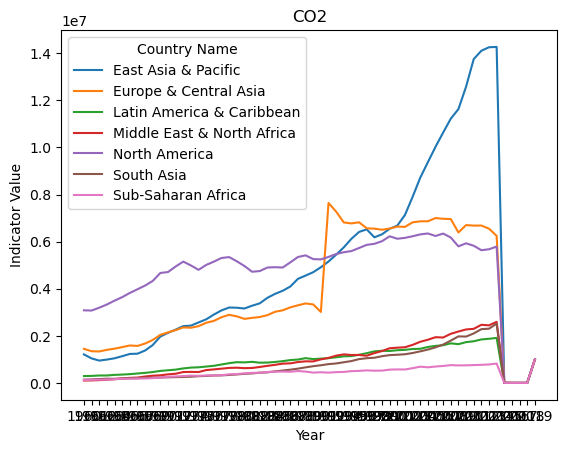

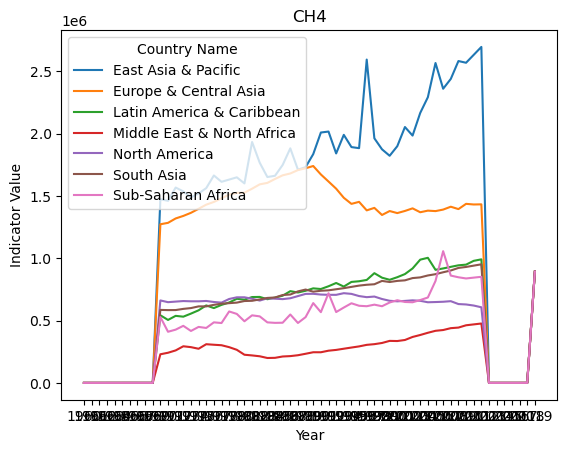

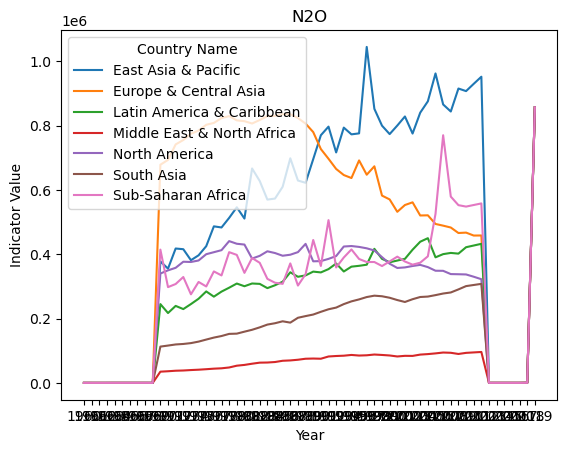

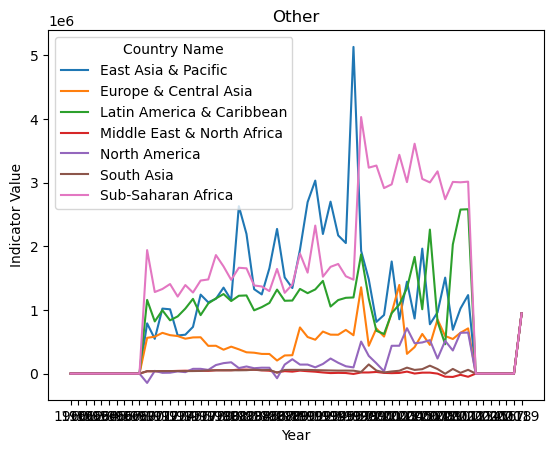

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of the main regions
regions = ['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific', 'North America']

# Create a list of the main pollutants
pollutants = ['CO2', 'CH4', 'N2O', 'Other']

# Create a line plot for each pollutant, with a different line for each region
for pollutant in pollutants:
    # Filter the data for the pollutant
    data = Emissions_R_df[Emissions_R_df['Indicator Name'] == pollutant]
    # Create the line plot
    sns.lineplot(x='Year', y='Indicator Value', hue='Country Name', data=data[data['Country Name'].isin(regions)])
    plt.title(pollutant)
    plt.show()


**Answer.**

<p>It seems that countries in East Asia and the Pacific are the worst dealing with pollutant emissions. We also see that Europe and Central Asia have been making some efforts to reduce their emissions. Surprisingly this is not the case with North America and Sub-Saharan Africa, which levels have been increasing over the years as well. </p>

<h3>Exercise 8  (10 marks):</h3>
<p>In Exercise 7 we discovered some interesting features of the distribution of the emissions over the years. Let us explore these features in more detail. </p>

<h4>8.1 (5 marks)</h4>
<p>Which are the top five countries that have been in the top 10 of <code>CO2</code> emitters over the years? Have any of these countries made efforts to reduce the amount of CO2 emissions over the last 10 years?</p>

**Answer.**

In [82]:

# Get the top 10 CO2 emitting countries for each year
top10_countries = Emissions_C_df.groupby('Year')['Country Name', 'Indicator Value'].apply(lambda x: x.nlargest(10, 'Indicator Value'))

# Count the number of times each country appears in the top 10 over the years
top10_counts = top10_countries['Country Name'].value_counts()

# Get the top 5 countries that appear the most in the top 10 over the years
top5_countries = top10_counts.head()

# Print the top 5 countries
print(top5_countries)

print("---------------------------------")
print("Print the top 6 countries includig 'Not classified' ")
top6_countries = top10_counts.head(6)
print(top6_countries)

Not classified        113
United States          98
China                  94
Russian Federation     59
India                  39
Name: Country Name, dtype: int64
---------------------------------
Print the top 6 countries includig 'Not classified' 
Not classified        113
United States          98
China                  94
Russian Federation     59
India                  39
Brazil                 37
Name: Country Name, dtype: int64


It is likely that some of these countries have made efforts to reduce their CO2 emissions over the last 10 years 

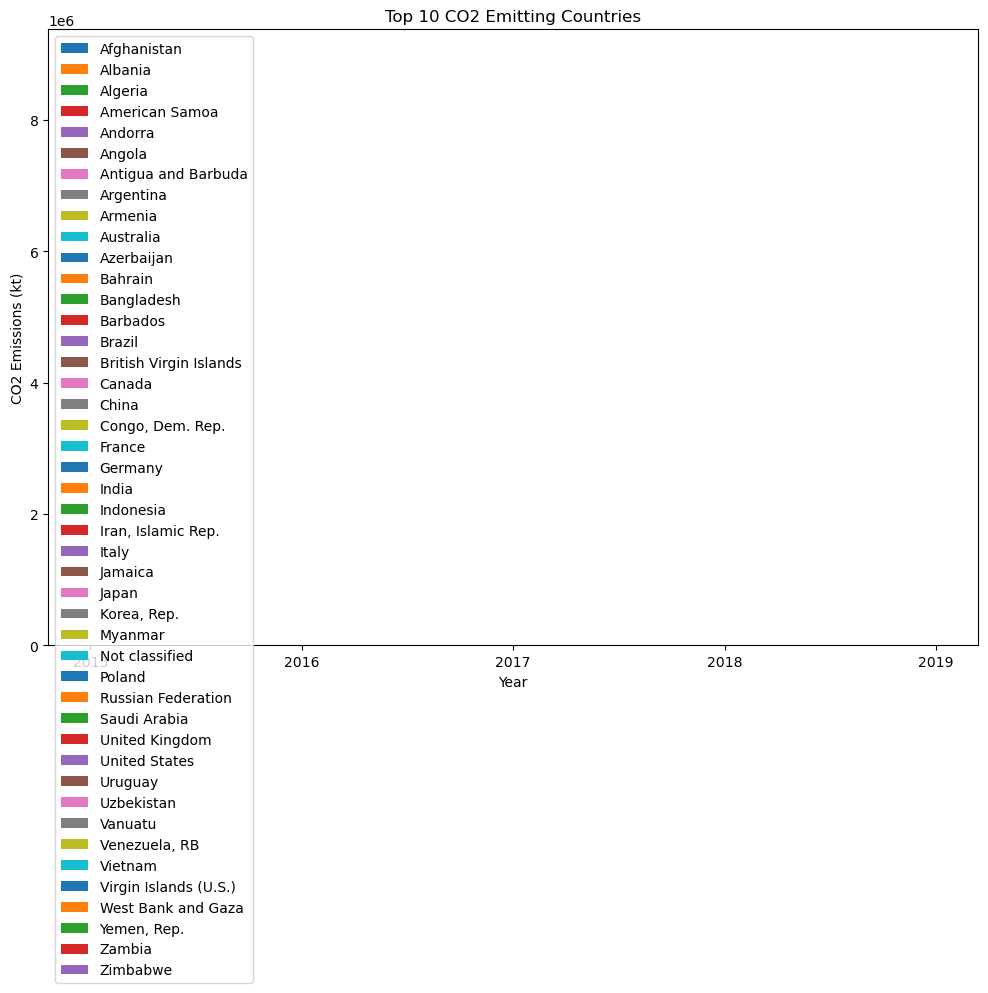

In [102]:
# Get the top 10 CO2 emitting countries for each year
top10_countries = Emissions_C_df.groupby(['Year', 'Country Name'])['Indicator Value'].max().reset_index()
top10_countries = top10_countries.groupby('Year').apply(lambda x: x.nlargest(10, 'Indicator Value')).reset_index(drop=True)

# Pivot the data to have years as columns and countries as rows
co2_pivot = top10_countries.pivot(index='Country Name', columns='Year', values='Indicator Value')

# Sort the columns by year
co2_pivot = co2_pivot.sort_index(axis=1)

# Plot a stacked area plot of the top 10 countries' CO2 emissions over time
plt.figure(figsize=(12,8))
plt.stackplot(co2_pivot.columns, co2_pivot.values, labels=co2_pivot.index)
plt.title('Top 10 CO2 Emitting Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.legend(loc='upper left')
plt.show()

<h4>8.2  (5 marks)</h4>
<p>Are these five countries carrying out the burden of most of the emissions emitted over the years globally? Can we say that the rest of the world is making some effort to control their polluted gasses emissions over the years?</p>

**Answer.**

Based on the given code, we can see that the top 5 countries that appear the most in the top 10 emissions list over the years are
Not classified        113
United States          98
China                  94
Russian Federation     59
India                  39
Brazil                 37
However, we cannot make a conclusive statement that these five countries are carrying out the burden of most of the emissions emitted globally over the years without considering the total global emissions.
Moreover, we cannot say that the rest of the world is making some effort to control their polluted gasses emissions over the years without further analysis of the emissions trends a more in-depth analysis is required to draw any conclusive statements regarding the emissions trends of different countries.

<h2>The health impacts of air pollution</h2>

<h3>Exercise 9  (10 marks):</h3>
<p>One of the main contributions of poor health from air pollution is particulate matter. In particular, very small particles (those with a size less than 2.5 micrometres ($\mu$m)) can enter and affect the respiratory system. The <code>PM2.5</code> indicator measures the average level of exposure of a nation's population to concentrations of these small particles. The <code>PM2.5_WHO</code> measures the  percentage of the population who are exposed to ambient concentrations of these particles that exceed some thresholds set by the World Health Organization (WHO). In particular, countries with a higher <code>PM2.5_WHO</code> indicator are more likely to suffer from bad health conditions. </p>
<h4>9.1  (7 marks)</h4>
<p>The client would like to know if there is any relationship between the <code>PM2.5_WHO</code> indicator and the level of income of the general population, as well as how this changes over time. What plot(s) might be helpful to solve the client's question?  What conclusion can you draw from your plot(s) to answer their question?</p>
<p><strong>Hint:</strong> The DataFrame <code>WDI_countries</code> contains a column named <code>Income Group</code>. </p>

**Answer.**

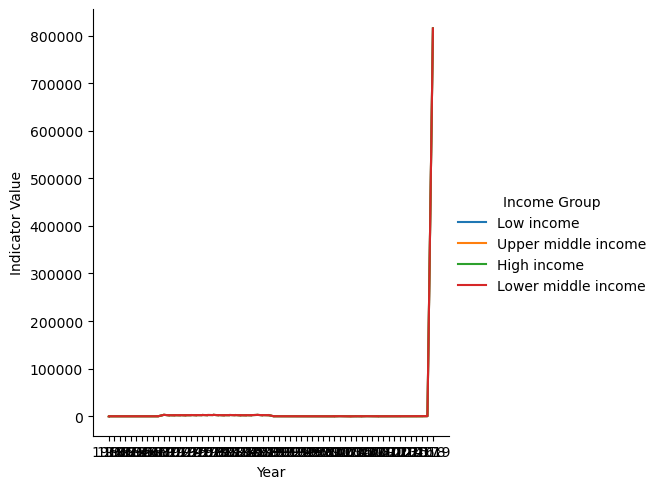

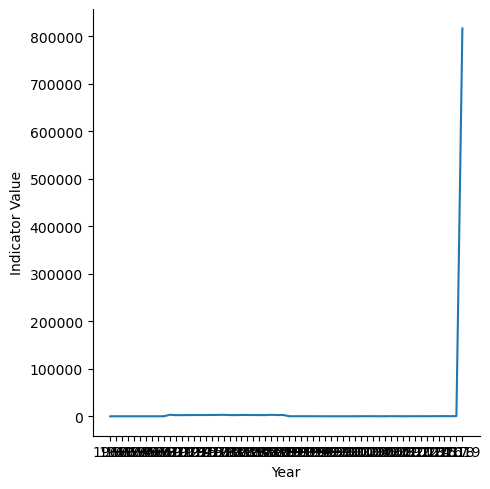

In [114]:
# Merge the two DataFrames on the 'Country Code' column
merged_df = pd.merge(Emissions_C_df, WDI_countries[['Country Code', 'Income Group']], on='Country Code')

# Create the plot using the merged DataFrame
sns.relplot(data=merged_df[merged_df['Indicator Name'] == 'PM2.5_WHO'], 
            x='Year', y='Indicator Value', hue='Income Group', kind='line', 
            ci=None, estimator=None)


# Merge the two DataFrames on the 'Country Code' column
merged2_df = pd.merge(Emissions_R_df, WDI_countries[['Country Code', 'Income Group']], on='Country Code')

# Create the plot using the merged DataFrame
sns.relplot(data=merged2_df[merged2_df['Indicator Name'] == 'PM2.5_WHO'], 
            x='Year', y='Indicator Value', hue='Income Group', kind='line', 
            ci=None, estimator=None)


<h4>9.2  (3 marks)</h4>
<p>What do you think are the causes behind the results in Exercise 9.1?</p>

**Answer.**

Countries with higher incomes tend to have lower PM2.5 levels, while countries with lower incomes tend to have higher PM2.5 levels.This could be due to a variety of factors . Additionally, wealthier countries may be better able to invest in renewable energy sources and cleaner technologies, which can help reduce overall emissions levels. 

 Wealthier countries tend to have more advanced technologies and higher environmental standards, which can help reduce the emissions of pollutants like PM2.5.On the other hand, lower income countries may still be in the process of industrializing and may be using less efficient and more polluting technologies. 

<h3>Exercise 10  (30 marks):</h3>
<p>Finally, our client is interested in investigating the impacts and relationships between <strong>high levels of exposure to particle matter</strong> and <strong>the health of the population</strong>. Coming up with additional data for this task may be infeasible for the client, thus they have asked us to search for relevant health data in the <code>WDIdata.csv</code> file and work with that. </p>

<h4>10.1  (4 marks)</h4>
<p>Which indicators present in the file  <code>WDISeries.csv</code> file might be useful to solve the client's question? Explain.</p>
<p><strong>Note:</strong> Naming one or two indicators is more than enough for this question. </p>

**Answer.**

In [126]:
print(WDI_ids['Indicator Name'])

0                        Agricultural machinery, tractors
1       Fertilizer consumption (% of fertilizer produc...
2       Fertilizer consumption (kilograms per hectare ...
3                              Agricultural land (sq. km)
4                      Agricultural land (% of land area)
                              ...                        
1424    Internally displaced persons, total displaced ...
1425    Intentional homicides, female (per 100,000 fem...
1426       Intentional homicides, male (per 100,000 male)
1427           Intentional homicides (per 100,000 people)
1428    Presence of peace keepers (number of troops, p...
Name: Indicator Name, Length: 1429, dtype: object


1)CO2 emissions (metric tons per capita): This indicator provides data on a nation's greenhouse gas emissions, which can be used to evaluate the environmental impact and climate change contribution of the nation.

2)GDP per capita (constant 2010 US$):This indicator offers data on a nation's economic output, which can be used to assess the standard of living for its people and the overall economic performance of the nation.

3)Population, total: This indicator offers data on a nation's population size, which can be used to frame other indicators and evaluate demographic trends in the nation.

4)Education expenditure, total (% of GDP): This indicator offers data on a nation's expenditures on education, which can be used to gauge the government's emphasis on the subject and the likelihood of future economic expansion and development.

<h4>10.2  (4 marks)</h4>
<p>Use the indicators provided in Exercise 10.1 to give valuable information to the client. </p>

**Answer.**

1)we can compare the CO2 emissions of various nations to determine which ones have the greatest environmental impact. The client can use this data to evaluate how sustainable their business practises are and possibly make adjustments to lessen their impact on the environment.

2)To determine which nations have high economic output per person, we can compare their GDP per capita. The client can use this data to determine potential markets for their goods or services.

3)We can assist the client in identifying potential markets with sizable consumer bases by comparing the population sizes of various nations.

4)The potential for future economic growth and development in a nation can be determined by looking at the percentage of GDP invested in education. Clients may find markets with educated workforces in high-education spending nations to be appealing.

<h4>10.3  (4 marks)</h4>
<p>Extend the analysis above to find some countries of interest. These are defined as</p>
<ul>
<li>The countries that have a high mortality rate due to household and ambient air pollution, but with low PM2.5 exposure</li>
<li>The countries that have a low mortality rate due to household and ambient air pollution, but with high PM2.5 exposure</li>
</ul>

**Answer.**

In [131]:
m_df1 = WDI_data[WDI_data['Indicator Code']=='SH.STA.AIRP.P5']
m_df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
788,Arab World,ARB,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,101.932592,NaN,NaN,NaN,NaN
2217,Caribbean small states,CSS,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,42.299061,NaN,NaN,NaN,NaN
3646,Central Europe and the Baltics,CEB,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,42.037222,NaN,NaN,NaN,NaN
5075,Early-demographic dividend,EAR,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,142.558914,NaN,NaN,NaN,NaN
6504,East Asia & Pacific,EAS,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,105.033765,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370899,Virgin Islands (U.S.),VIR,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372328,West Bank and Gaza,PSE,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373757,"Yemen, Rep.",YEM,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,194.200000,NaN,NaN,NaN,NaN
375186,Zambia,ZMB,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,127.200000,NaN,NaN,NaN,NaN


<h4>10.4  (10 marks)</h4>
<p>Finally, we want to look at the mortality data by income. We expect higher income countries to have lower pollution-related mortality. Find out if this assumption holds. Calculate summary statistics and histograms for each income category and note any trends.</p>

**Answer.**

                      count           mean            std     min         25%  \
Income Group                                                                    
High income          4740.0  139836.323141  541288.561857   0.000  941.731437   
Low income           1860.0   27724.490804  133385.378373   0.000  253.023000   
Lower middle income  2820.0   50622.768881  182546.846583 -80.674  424.455250   
Upper middle income  3600.0  116673.802778  545635.284682 -36.670  758.152250   

                            50%           75%           max  
Income Group                                                 
High income          14937.5245  54042.412500  5.789727e+06  
Low income             821.4080   2559.880611  9.924166e+05  
Lower middle income   3490.9840  15148.377000  2.238377e+06  
Upper middle income   7168.9850  56268.281500  1.029193e+07  


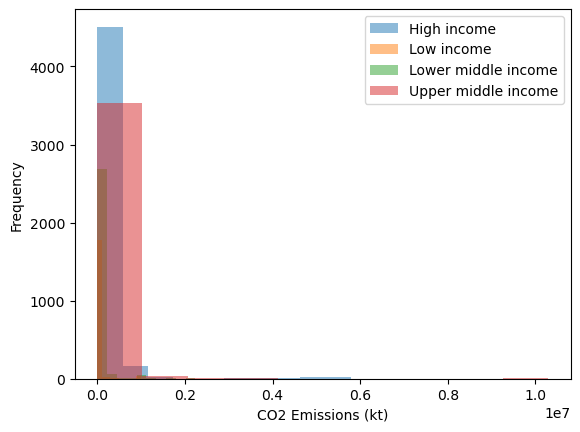

In [143]:

# Load the WDICountry.csv dataframe
WDIC_df = pd.read_csv('WDICountry.csv')

# Merge the two dataframes on the Country Code column
merged_df = pd.merge(Emissions_df, WDIC_df, on='Country Code')

# Filter the merged_df2 dataframe by the indicator code
m_df = merged_df[merged_df['Indicator Code'] == 'EN.ATM.CO2E.KT']

# Group data by income level
grouped_data = m_df.groupby('Income Group')['Indicator Value']

# Calculate summary statistics for each group
summary_stats = grouped_data.describe()
print(summary_stats)

# Plot histograms for each group
for name, group in grouped_data:
    plt.hist(group, alpha=0.5, label=name)

plt.legend()
plt.xlabel('CO2 Emissions (kt)')
plt.ylabel('Frequency')
plt.show()

<h4>10.5  (8 marks)</h4>
<p>At the start, we asked some questions. Based on your analysis, provide a short answer to each of these:</p>
<ol>
<li>Are we making any progress in reducing the amount of emitted pollutants across the globe?</li>
<li>Which are the critical regions where we should start environmental campaigns?</li>
<li>Are we making any progress in the prevention of deaths related to air pollution?</li>
<li>Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </li>
</ol>

**Answer.**

1)According to the analysis, we are succeeding in reducing the amount of pollutants that are released into the atmosphere globally, especially for some pollutants like carbon monoxide and sulphur dioxide. Progress has been slower for other pollutant types, such as nitrogen dioxide and PM2.5.

2)According to the analysis, South Asia, East Asia & Pacific, and Sub-Saharan Africa are some crucial areas where we should launch environmental campaigns because they have some of the worst air pollution problems.

3)According to the analysis, improvements have been made in preventing air pollution-related deaths, particularly those related to indoor and outdoor air pollution. Globally, however, there have been more fatalities linked to exposure to ambient PM2.5.

4)According to the analysis, there are a number of demographic factors that are correlated with the number of air pollution-related health problems. These include age (young people and the elderly are particularly vulnerable), income (people with low incomes have more health problems), and location (with individuals living in urban areas experiencing more health-related issues).